In [125]:
Assignment:4
1. you have to create one supervisor node.
2. create one router function
3. create three more node
3.1 llm call (llm node)
3.2 RAG (rag node)
3.3 web crawler(fetch the info in realtime from internet)
4. created one more node after this for validation for generated output --> explore the validation part how to do that
5. if validation going to be failed in that case again go to supervioser node and then supervisor node will again decide what needs to be call next
6. once the validation will pass then only generate the final output

Supervisor ➝ Router ➝ (LLM / RAG / Web) ➝ ✅ Pydantic Validation ➝ Post-Validation Router ➝ (Final Output / Supervisor Retry)


SyntaxError: invalid character '➝' (U+279D) (1599413519.py, line 12)

#### Step 1. Import Libraries

In [ ]:
import operator
from typing import List
from pydantic import BaseModel , Field
from langchain.prompts import PromptTemplate
from typing import TypedDict, Annotated, Sequence
from langchain_core.messages import BaseMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate, PromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.graph import StateGraph,END

#### Step 2. Load env

In [ ]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [ ]:
os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")

#### Step 4. Init o1-mini Model

In [ ]:
from langchain_openai import ChatOpenAI
model = ChatOpenAI(model="o1-mini")
result = model.invoke("Hi")
print(result)

content='Hello! How can I assist you today?' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 212, 'prompt_tokens': 9, 'total_tokens': 221, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 192, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'o1-mini-2024-09-12', 'system_fingerprint': 'fp_3da8b0b088', 'id': 'chatcmpl-BhHGx282P6CtUXTh6LL6qjXDei3Ty', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None} id='run--31283295-8745-4d14-bec0-e09d60ed3410-0' usage_metadata={'input_tokens': 9, 'output_tokens': 212, 'total_tokens': 221, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 192}}


#### Step 5. Embeddings

In [ ]:
from langchain_huggingface import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(model_name="BAAI/bge-small-en")
len(embeddings.embed_query("Elo, mate"))

c:\Users\aditi_zg48xl\Downloads\Agentic AI\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


384

#### Step 6: Create Vector Database

In [ ]:
from langchain_community.document_loaders import TextLoader, DirectoryLoader
from langchain_community.vectorstores import Chroma 
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [ ]:
loader = TextLoader(r"C:\Users\aditi_zg48xl\Downloads\Agentic AI\Assignment_4\Data\genetic_diseases.txt")
docs = loader.load()

In [ ]:
docs 

[Document(metadata={'source': 'C:\\Users\\aditi_zg48xl\\Downloads\\Agentic AI\\Assignment_4\\Data\\genetic_diseases.txt'}, page_content="Genetic diseases are medical conditions caused by anomalies in the genome, either inherited from one's parents or acquired through spontaneous mutations. These diseases can be categorized based on the type and location of the genetic defect: single-gene disorders, multifactorial disorders, chromosomal abnormalities, and mitochondrial genetic diseases.\n\nSingle-gene disorders, or monogenic diseases, result from mutations in a single gene. These include well-known conditions such as cystic fibrosis (CF), sickle cell anemia, Tay-Sachs disease, and Huntingtonâ€™s disease. In CF, mutations in the CFTR gene cause defective chloride ion transport, leading to thickened mucus in the lungs and digestive system. Sickle cell anemia, on the other hand, arises from a point mutation in the HBB gene, causing abnormal hemoglobin structure and leading to hemolytic ane

#### Step 7.1 Using recursive text splitter divide into chunks

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 200,
    chunk_overlap = 50
)

In [ ]:
new_docs = text_splitter.split_documents(documents = docs)

In [ ]:
new_docs

[Document(metadata={'source': 'C:\\Users\\aditi_zg48xl\\Downloads\\Agentic AI\\Assignment_4\\Data\\genetic_diseases.txt'}, page_content="Genetic diseases are medical conditions caused by anomalies in the genome, either inherited from one's parents or acquired through spontaneous mutations. These diseases can be categorized based on the"),
 Document(metadata={'source': 'C:\\Users\\aditi_zg48xl\\Downloads\\Agentic AI\\Assignment_4\\Data\\genetic_diseases.txt'}, page_content='These diseases can be categorized based on the type and location of the genetic defect: single-gene disorders, multifactorial disorders, chromosomal abnormalities, and mitochondrial genetic diseases.'),
 Document(metadata={'source': 'C:\\Users\\aditi_zg48xl\\Downloads\\Agentic AI\\Assignment_4\\Data\\genetic_diseases.txt'}, page_content='Single-gene disorders, or monogenic diseases, result from mutations in a single gene. These include well-known conditions such as cystic fibrosis (CF), sickle cell anemia, Tay-Sachs 

#### Step 7.2 Using FAISS VectorDB

In [ ]:
from langchain_community.vectorstores import FAISS

vector_db = FAISS.from_documents(new_docs, embeddings)


In [ ]:
retriever = vector_db.as_retriever(search_kwargs={"k" : 5})

In [ ]:
retriever.invoke("What are simple-gene disorders")

[Document(id='bf4192a6-0874-4ac2-8f67-cc00f6a3aaf7', metadata={'source': 'C:\\Users\\aditi_zg48xl\\Downloads\\Agentic AI\\Assignment_4\\Data\\genetic_diseases.txt'}, page_content='Single-gene disorders, or monogenic diseases, result from mutations in a single gene. These include well-known conditions such as cystic fibrosis (CF), sickle cell anemia, Tay-Sachs disease, and'),
 Document(id='369fe557-298a-43c7-90cf-d4642e4eb61b', metadata={'source': 'C:\\Users\\aditi_zg48xl\\Downloads\\Agentic AI\\Assignment_4\\Data\\genetic_diseases.txt'}, page_content='challenge in predicting and managing these disorders.'),
 Document(id='de13ca20-cda4-4f88-a6e2-3e52fdffc1aa', metadata={'source': 'C:\\Users\\aditi_zg48xl\\Downloads\\Agentic AI\\Assignment_4\\Data\\genetic_diseases.txt'}, page_content="Genetic diseases are medical conditions caused by anomalies in the genome, either inherited from one's parents or acquired through spontaneous mutations. These diseases can be categorized based on the"),
 

In [ ]:
from pydantic import BaseModel, Field

In [ ]:
from pydantic import BaseModel, Field

class RoutingOutput(BaseModel):
    Topic: str = Field(description="Must be one of 'VectorDB', 'LLM', or 'WebSearch'")

In [ ]:
from langchain.output_parsers import PydanticOutputParser

In [ ]:
parser = PydanticOutputParser(pydantic_object=RoutingOutput)

In [ ]:
parser.get_format_instructions

<bound method PydanticOutputParser.get_format_instructions of PydanticOutputParser(pydantic_object=<class '__main__.RoutingOutput'>)>

In [ ]:
class AgentState(TypedDict):
    message: Annotated[Sequence[BaseModel],operator.add]

In [ ]:
AgentState = {}

In [ ]:
AgentState["messages"]=[]

In [ ]:
AgentState

{'messages': []}

In [ ]:
AgentState["messages"].append("Hi, how are you?")

In [ ]:
AgentState["messages"].append("Supp")

In [ ]:
AgentState["messages"].append("Reply to me")

In [ ]:
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]

In [ ]:
def function_1(state: AgentState):
    question = state["messages"][-1]
    print("Question:", question)

    template = """
    Your task is to classify the user query into one of the following categories:
    [RAG, LLM, WebSearch].

    Only respond with the category name and nothing else.

    User query: {question}
    {format_instructions}
    """

    prompt = PromptTemplate(
        template=template,
        input_variables=["question"],
        partial_variables={"format_instructions": parser.get_format_instructions()}
    )

    chain = prompt | model | parser

    response = chain.invoke({"question": question})
    print("Parsed response:", response)

    return {"messages": [response.Topic]}


In [ ]:
state={"messages":["What are simple-gene disorders"]}

In [ ]:
function_1(state)

Question What are simple-gene disorders
Parsed response: Topic='Genetic Disease' Reasoning='Simple-gene disorders are caused by mutations in a single gene, classifying them as genetic diseases.'


{'messages': ['Genetic Disease']}

In [ ]:
def router(state: AgentState):
    print("->-> Router ->->")
    
    topic = state["messages"][-1].strip().lower()
    print("Routing topic:", topic)

    if topic == "vectordb":
        return "RAG"
    elif topic == "llm":
        return "LLM Call"
    elif topic == "websearch":
        return "Web Crawler"
    else:
        print("Unknown topic, defaulting to LLM Call")
        return "LLM Call"


In [ ]:
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

In [ ]:
# RAG Function
def function_2(state:AgentState):
    print("-> RAG Call ->")
    
    question = state["messages"][0]
    
    prompt=PromptTemplate(
        template="""You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.\nQuestion: {question} \nContext: {context} \nAnswer:""",
        
        input_variables=['context', 'question']
    )
    
    rag_chain = (
        {"context": retriever | format_docs, "question": RunnablePassthrough()}
        | prompt
        | model
        | StrOutputParser()
    )
    result = rag_chain.invoke({"question": question})
    return  {"messages": [result]}

In [ ]:
def function_3(state: AgentState):
    print("->-> LLM Call ->->")

    question = state["messages"][0]

    complete_query = (
        "Answer the following question with your real-world knowledge. "
        f"User question: {question}"
    )

    response = model.invoke(complete_query)
    print("LLM Raw Response:", response)

    # Extract answer content safely
    if hasattr(response, 'content'):
        answer = response.content
    elif hasattr(response, 'text'):
        answer = response.text
    else:
        answer = str(response)

    return {"messages": [answer]}


In [ ]:
from langchain_community.tools import DuckDuckGoSearchRun

In [ ]:
search = DuckDuckGoSearchRun()

In [ ]:
def function_4(state: AgentState):
    print("->-> Web Search Call ->->")

    question = state["messages"][0]

    # Run the web search
    results = search.run(question)
    
    print("Search Result:", results)
    
    return {"messages": [results]}

In [ ]:
from langgraph.graph import StateGraph, END

In [137]:
from pydantic import BaseModel, ValidationError, validator

# Define a model for validating the response
class OutputModel(BaseModel):
    response: str

    @validator("response")
    def check_min_length_and_topic(cls, value):
        if not value or len(value.strip()) < 1:
            raise ValueError("Output too short.")
        if "genetic" not in value.lower() and "disease" not in value.lower():
            raise ValueError("Output does not relate to genetic diseases.")
        return value

# Agentic validation function
def function_5(state: AgentState):
    print("->-> Validation Node ->->")

    latest_output = state["messages"][-1]

    try:
        # Validate using Pydantic model
        OutputModel(response=latest_output)
        print("✅ Passed Validation")
        return {"messages": ["VALIDATED"]}
    except ValidationError as e:
        print("❌ Validation Error:", e)
        return {"messages": ["VALIDATION_FAILED"]}


C:\Users\aditi_zg48xl\AppData\Local\Temp\ipykernel_16636\1792777266.py:7: PydanticDeprecatedSince20: Pydantic V1 style `@validator` validators are deprecated. You should migrate to Pydantic V2 style `@field_validator` validators, see the migration guide for more details. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  @validator("response")


In [ ]:
def post_validation_router(state: AgentState):
    print("->-> Post-Validation Router ->->")

    if state["messages"][-1] == "VALIDATED":
        return "Final Output"
    else:
        return "Supervisor"

In [ ]:
def final_output(state: AgentState):
    print("✅ Final Output Node")
    
    # The actual answer is second last because the last message is "VALIDATED"
    answer = state["messages"][-2] if state["messages"][-1] == "VALIDATED" else state["messages"][-1]
    
    return {"messages": [f"Final Answer: {answer}"]}


In [128]:

workflow = StateGraph(AgentState)

In [129]:
workflow.add_node("Supervisor", function_1)
workflow.add_node("Router", router)
workflow.add_node("LLM Call", function_3)
workflow.add_node("RAG", function_2)
workflow.add_node("Web Crawler", function_4)
workflow.add_node("Validation", function_5)
workflow.add_node("Post-Validation Router", post_validation_router)
workflow.add_node("Final Output", final_output)

workflow.set_entry_point("Supervisor")

workflow.add_edge("Supervisor", "Router")
workflow.add_edge("Router", "LLM Call")
workflow.add_edge("Router", "RAG")
workflow.add_edge("Router", "Web Crawler")
workflow.add_edge("LLM Call", "Validation")
workflow.add_edge("RAG", "Validation")
workflow.add_edge("Web Crawler", "Validation")
workflow.add_edge("Validation", "Post-Validation Router")
workflow.add_edge("Post-Validation Router", "Final Output")
workflow.add_edge("Post-Validation Router", "Supervisor")

In [131]:
app = workflow.compile()

In [133]:
from IPython.display import Image,display

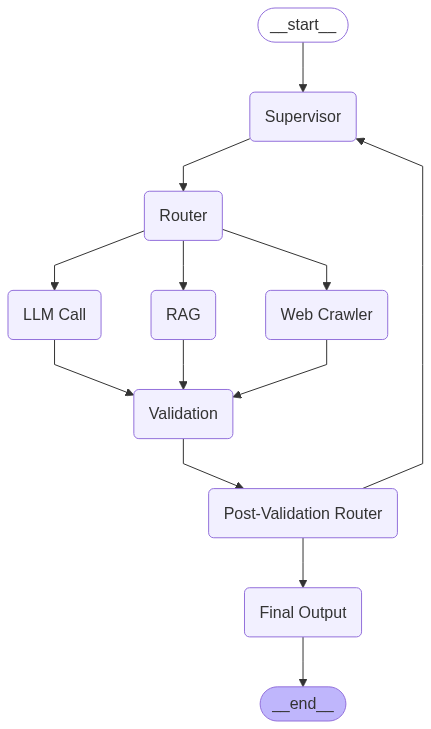

In [134]:
display(Image(app.get_graph().draw_mermaid_png()))

#### Testing

In [138]:
state={"messages":["Hi"]}

In [139]:
workflow.compile().invoke(state)

Question: Hi


OutputParserException: Failed to parse OutputModel from completion {"response": "LLM"}. Got: 1 validation error for OutputModel
response
  Value error, Output too short. [type=value_error, input_value='LLM', input_type=str]
    For further information visit https://errors.pydantic.dev/2.11/v/value_error
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/OUTPUT_PARSING_FAILURE 